In [8]:
import os
import numpy as np
import random
import pandas as pd
import torch
import torch.nn as nn

In [2]:
from factory.LstmDV import D_VECTOR

In [3]:
ROOT = 'spmel'
sample_uttr_idx = 15
max_uttr_idx = 49

In [4]:
all_speaker = next(iter(os.walk(f'{ROOT}')))[1]
num_speaker= int(len(all_speaker))
result = np.zeros((num_speaker,num_speaker))
C = torch.load('dv_7000_1_21.pt').to('cuda:0')

In [5]:
all_dv = []
for i in range(num_speaker):
    all_uttr = next(iter(os.walk(f'{ROOT}/{i}')))[2][:sample_uttr_idx]
    tmp_dv = torch.zeros((1,256))
    for uttr in all_uttr:
        mel = torch.from_numpy(np.load(f'{ROOT}/{i}/{uttr}')).unsqueeze(0).cuda()
        tmp_dv += C(mel).detach().cpu().numpy()
    all_dv.append(tmp_dv/(sample_uttr_idx+1))

In [9]:
for j,dv in enumerate(all_dv):
    print(f"Now --- {j}")
    for i in range(num_speaker):
        random_uttr = next(iter(os.walk(f'{ROOT}/{i}')))[2][random.randint(sample_uttr_idx,max_uttr_idx)]
        mel = torch.from_numpy(np.load(f'{ROOT}/{i}/{random_uttr}')).unsqueeze(0).cuda()
        t_dv = C(mel).detach().cpu()
        cos = nn.functional.cosine_similarity(dv,t_dv, dim=1, eps=1e-8)
        result[i][j] = cos

Now --- 0
Now --- 1
Now --- 2
Now --- 3
Now --- 4
Now --- 5
Now --- 6
Now --- 7
Now --- 8
Now --- 9
Now --- 10
Now --- 11
Now --- 12
Now --- 13
Now --- 14
Now --- 15
Now --- 16
Now --- 17
Now --- 18
Now --- 19
Now --- 20
Now --- 21
Now --- 22
Now --- 23
Now --- 24
Now --- 25
Now --- 26
Now --- 27
Now --- 28
Now --- 29
Now --- 30
Now --- 31
Now --- 32
Now --- 33
Now --- 34
Now --- 35
Now --- 36
Now --- 37
Now --- 38
Now --- 39
Now --- 40
Now --- 41


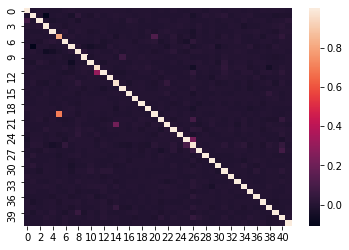

In [14]:
import seaborn as sns
import matplotlib.pylab as plt
ax = sns.heatmap(result)
plt.show()

In [10]:
my_dataframe = pd.DataFrame(result)
writer = pd.ExcelWriter('dv_result.xlsx')
my_dataframe.to_excel(writer)
writer.save()